In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [2]:
%cd C:\Users\Aaditya\OneDrive\Documents\tomato

C:\Users\Aaditya\OneDrive\Documents\tomato


In [3]:
pwd

'C:\\Users\\Aaditya\\OneDrive\\Documents\\tomato'

In [4]:
df=pd.read_excel('complete_from_2015.xlsx');

In [5]:
df.columns

Index(['index', 'Min_Price', 'Max_Price', 'Modal_Price'], dtype='object')

In [6]:
null_values = df.isnull().sum()
print(null_values)
print(df.info())

index          0
Min_Price      0
Max_Price      0
Modal_Price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        3157 non-null   datetime64[ns]
 1   Min_Price    3157 non-null   int64         
 2   Max_Price    3157 non-null   int64         
 3   Modal_Price  3157 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 98.8 KB
None


In [7]:
df.head(10)

,index,Min_Price,Max_Price,Modal_Price
0,2015-05-11,300,1800,1000
1,2015-05-12,200,1200,700
2,2015-05-13,200,1200,700
3,2015-05-14,200,1200,700
4,2015-05-15,200,1200,700
5,2015-05-16,200,1200,700
6,2015-05-17,200,1200,700
7,2015-05-18,250,1250,800
8,2015-05-19,250,1250,800
9,2015-05-20,500,2000,1000


In [8]:
# Extract features
df['Day_of_Week'] = df['index'].dt.dayofweek
df['Month'] = df['index'].dt.month
df['Is_Weekend'] = (df['Day_of_Week'] >= 5).astype(int)

In [9]:
df.head(10)

,index,Min_Price,Max_Price,Modal_Price,Day_of_Week,Month,Is_Weekend
0,2015-05-11,300,1800,1000,0,5,0
1,2015-05-12,200,1200,700,1,5,0
2,2015-05-13,200,1200,700,2,5,0
3,2015-05-14,200,1200,700,3,5,0
4,2015-05-15,200,1200,700,4,5,0
5,2015-05-16,200,1200,700,5,5,1
6,2015-05-17,200,1200,700,6,5,1
7,2015-05-18,250,1250,800,0,5,0
8,2015-05-19,250,1250,800,1,5,0
9,2015-05-20,500,2000,1000,2,5,0


In [10]:
# Filter data for year 2016
df_2016 = df[df['index'].dt.year == 2016]

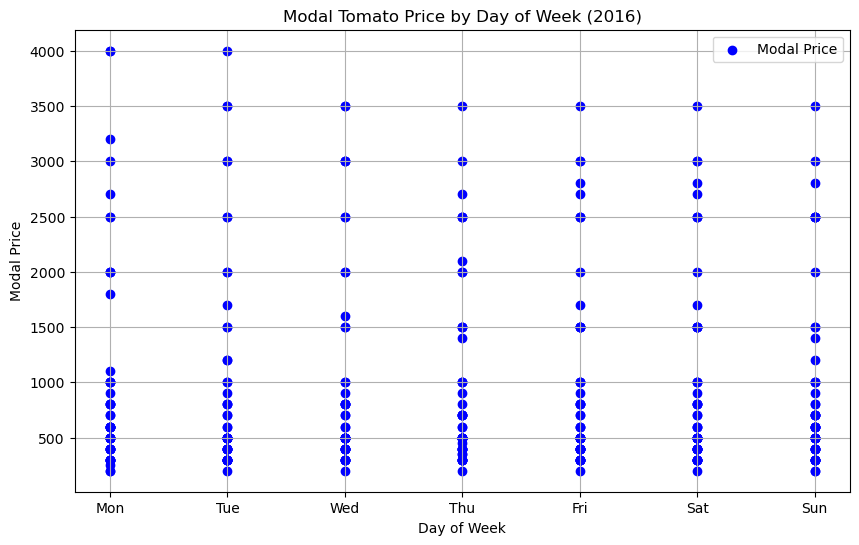

In [11]:
# Visualize data by Day of Week (for year 2016)
plt.figure(figsize=(10, 6))
plt.scatter(df_2016['Day_of_Week'], df_2016['Modal_Price'], color='blue', label='Modal Price')
plt.xlabel('Day of Week')
plt.ylabel('Modal Price')
plt.title('Modal Tomato Price by Day of Week (2016)')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.legend()
plt.show()

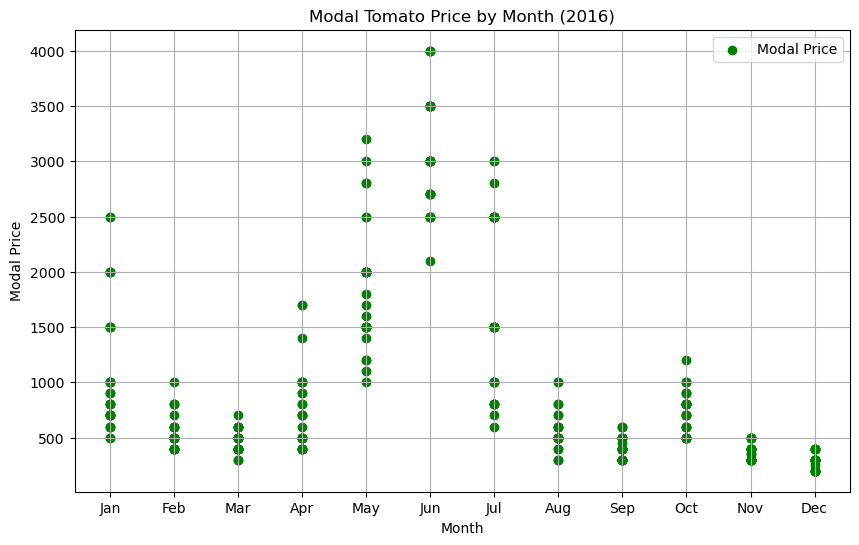

In [12]:
# Visualize data by Month (for year 2016)
plt.figure(figsize=(10, 6))
plt.scatter(df_2016['Month'], df_2016['Modal_Price'], color='green', label='Modal Price')
plt.xlabel('Month')
plt.ylabel('Modal Price')
plt.title('Modal Tomato Price by Month (2016)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend()
plt.show()


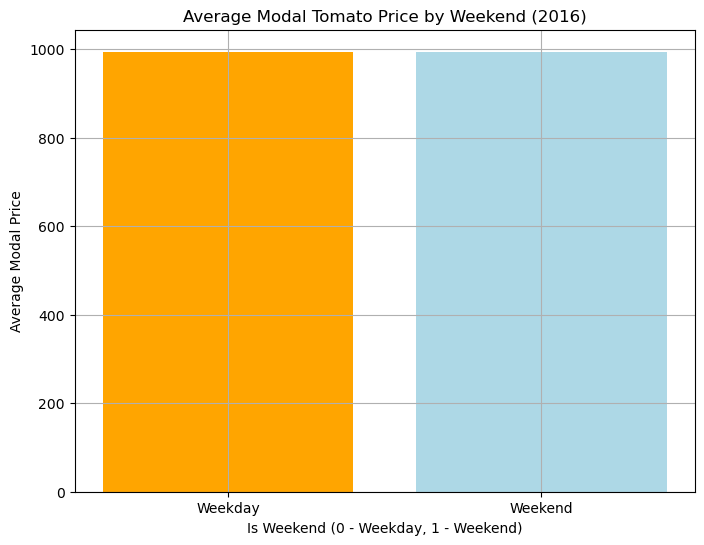

In [13]:
# Visualize data by Weekend (Weekdays vs Weekends) for year 2016
weekend_prices_2016 = df_2016.groupby('Is_Weekend')['Modal_Price'].mean()
plt.figure(figsize=(8, 6))
plt.bar(weekend_prices_2016.index, weekend_prices_2016.values, color=['orange', 'lightblue'])
plt.xlabel('Is Weekend (0 - Weekday, 1 - Weekend)')
plt.ylabel('Average Modal Price')
plt.title('Average Modal Tomato Price by Weekend (2016)')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.grid(True)
plt.show()


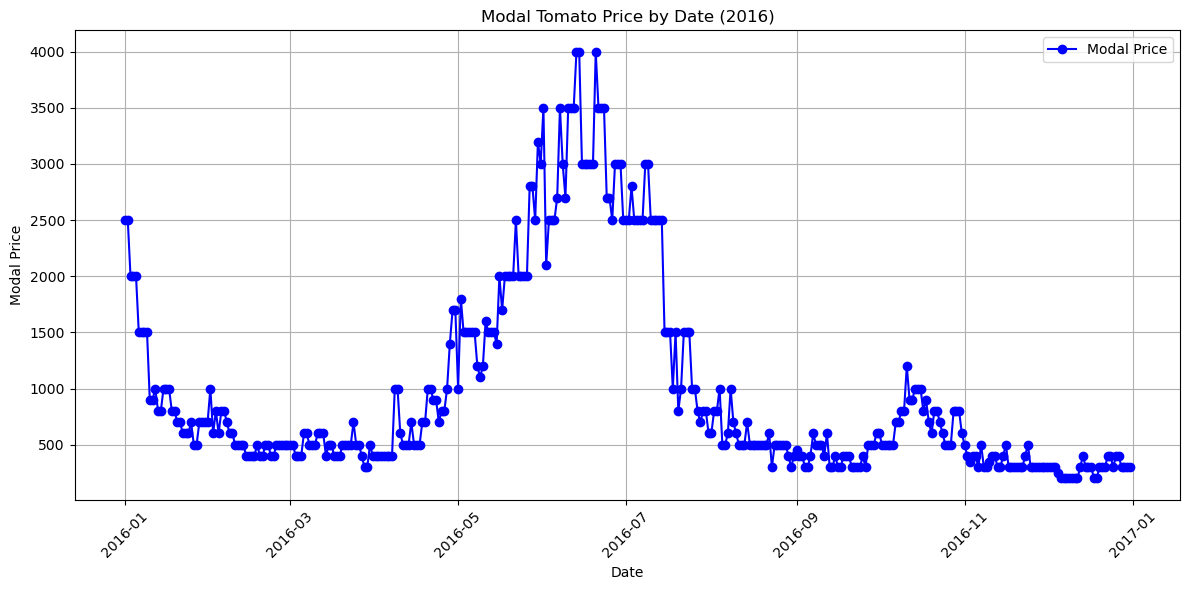

In [14]:
# Visualize data by Date (for year 2016)
plt.figure(figsize=(12, 6))
plt.plot(df_2016['index'], df_2016['Modal_Price'], marker='o', linestyle='-', color='blue', label='Modal Price')
plt.xlabel('Date')  # Using 'index' for dates
plt.ylabel('Modal Price')
plt.title('Modal Tomato Price by Date (2016)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# Assuming df is your DataFrame containing the data

def count_days_of_week_by_year(df):
    """
    Count the occurrences of each day of the week for every year in the DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
    
    Returns:
        DataFrame: A DataFrame with the count of occurrences of each day of the week for every year.
    """
    # Convert the 'index' column to datetime if it's not already
    df['index'] = pd.to_datetime(df['index'])
    
    # Extract year from the 'index' column
    df['Year'] = df['index'].dt.year
    
    # Group by year and day of the week and count occurrences
    day_counts_by_year = df.groupby(['Year', df['index'].dt.dayofweek]).size().unstack(fill_value=0)
    
    # Rename columns to day names
    day_counts_by_year.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    return day_counts_by_year

# Get the count of each day of the week for every year
day_counts_by_year = count_days_of_week_by_year(df)

# Display the counts
print("Counts of each day of the week for every year:")
print(day_counts_by_year)


Counts of each day of the week for every year:
      Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
Year                                                                
2015      34       34         34        34      33        33      33
2016      52       52         52        52      53        53      52
2017      52       52         52        52      52        52      53
2018      53       52         52        52      52        52      52
2019      52       53         52        52      52        52      52
2020      52       52         53        53      52        52      52
2021      52       52         52        52      53        52      52
2022      52       52         52        52      52        53      52
2023      52       52         52        52      52        52      53


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def filter_data_by_year(df, year):
    return df[df['index'].dt.year == year]

def visualize_average_price_by_day_of_week(df, year):
    df_year = filter_data_by_year(df, year)
    day_of_week_prices = df_year.groupby(df_year['index'].dt.dayofweek)['Modal_Price'].mean()
    plt.figure(figsize=(8, 6))
    plt.plot(day_of_week_prices.index, day_of_week_prices.values, marker='o', linestyle='-', color='green', label='Average Modal Price')
    plt.xlabel('Day of Week')
    plt.ylabel('Average Modal Price')
    plt.title(f'Average Modal Tomato Price by Day of Week ({year})')
    plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.grid(True)
    plt.legend()
    plt.show()

def visualize_average_price_by_month(df, year):
    df_year = filter_data_by_year(df, year)
    month_prices = df_year.groupby(df_year['index'].dt.month)['Modal_Price'].mean()
    plt.figure(figsize=(8, 6))
    plt.plot(month_prices.index, month_prices.values, marker='o', linestyle='-', color='orange', label='Average Modal Price')
    plt.xlabel('Month')
    plt.ylabel('Average Modal Price')
    plt.title(f'Average Modal Tomato Price by Month ({year})')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)
    plt.legend()
    plt.show()

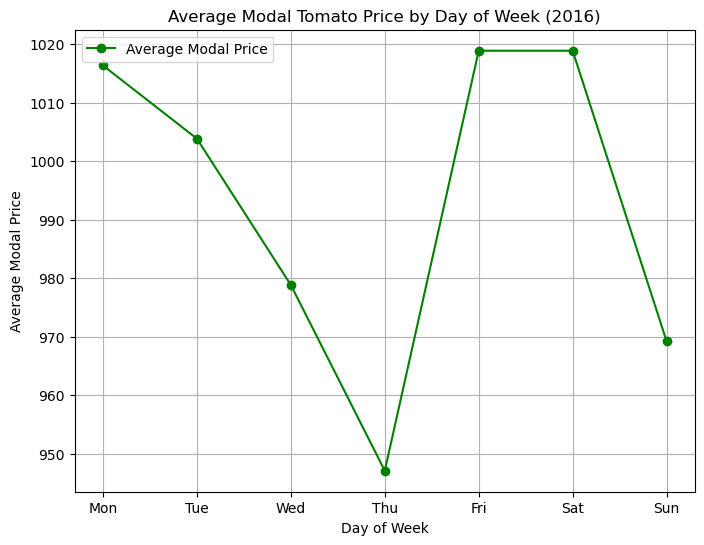

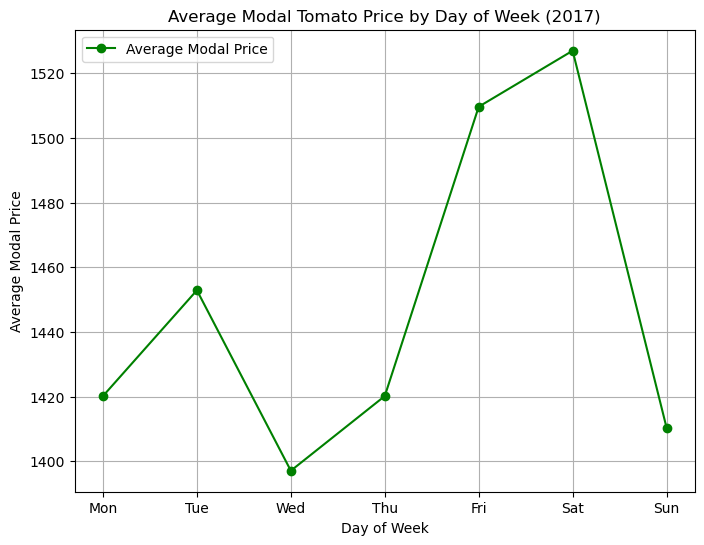

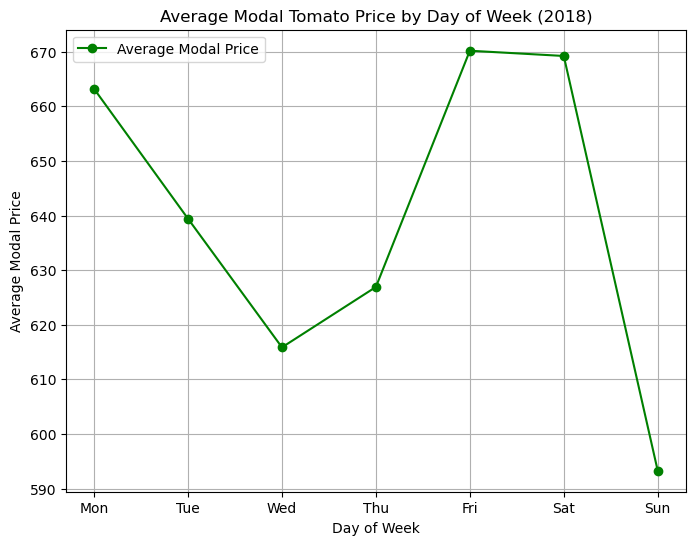

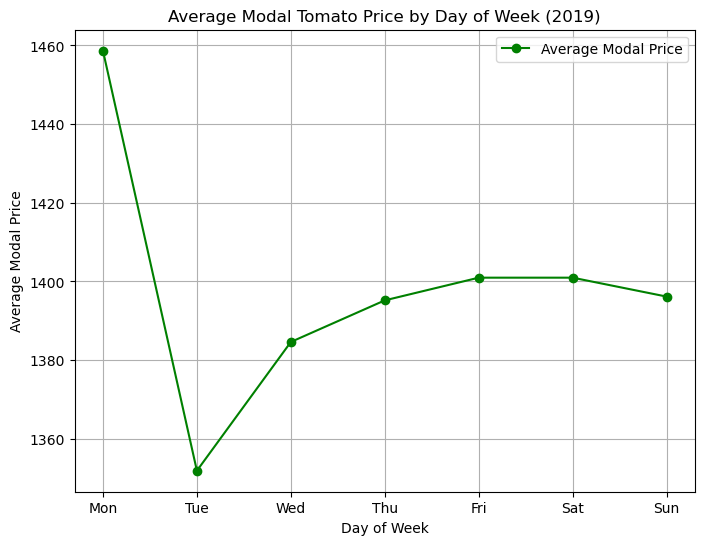

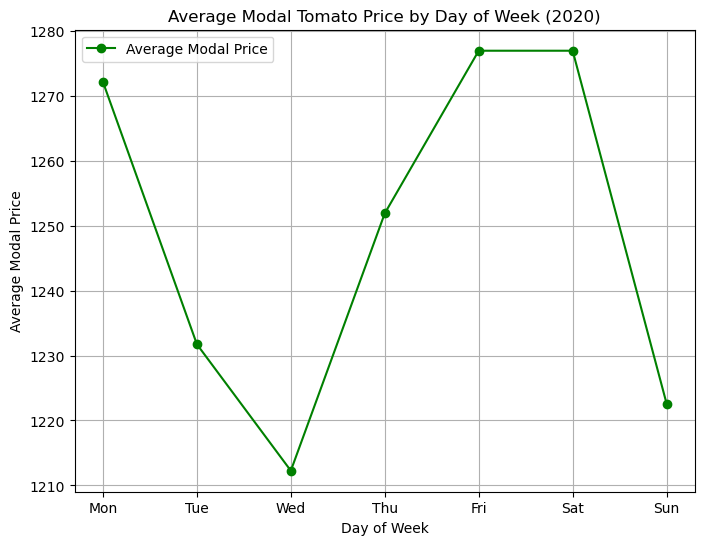

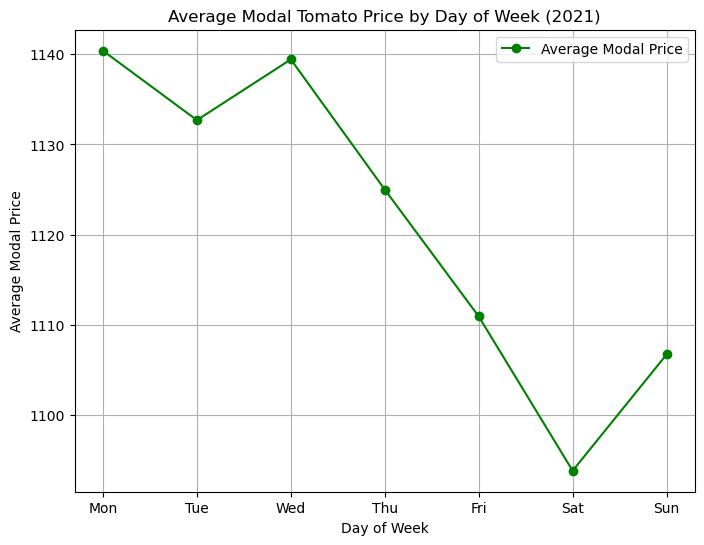

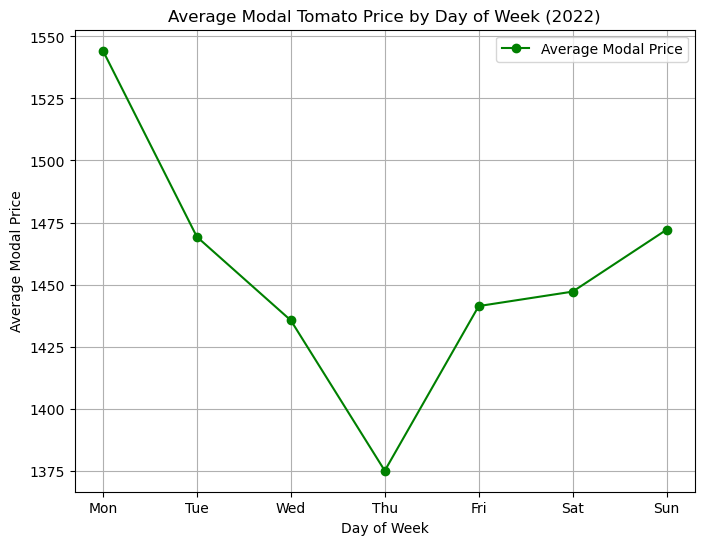

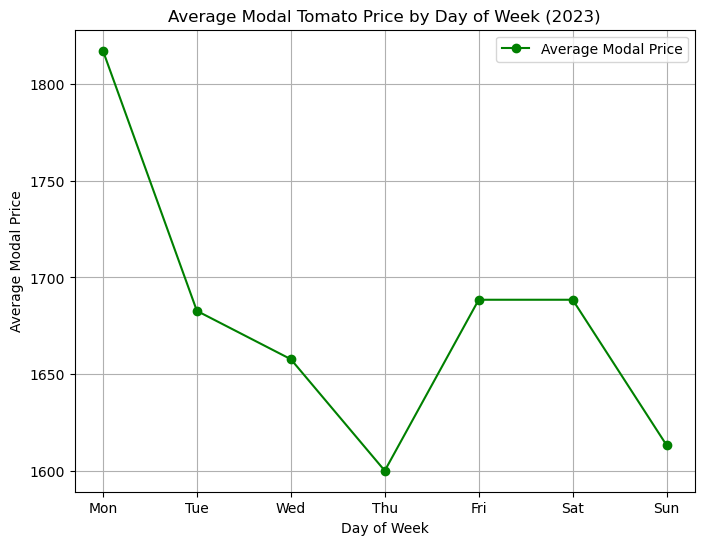

In [17]:
# Assuming df is your DataFrame containing the data

# Loop through the years from 2016 to 2023
for year in range(2016, 2024):
    # Filter data for the current year
    df_year = filter_data_by_year(df, year)
    
    # Visualize average price by day of the week
    visualize_average_price_by_day_of_week(df_year, year)


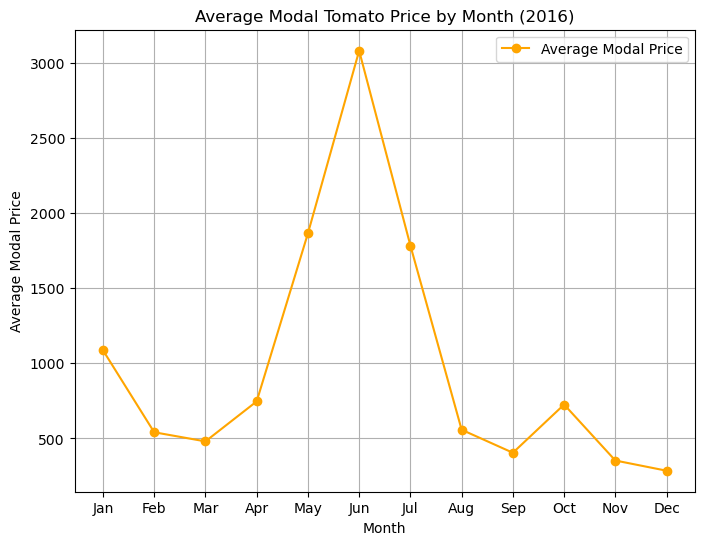

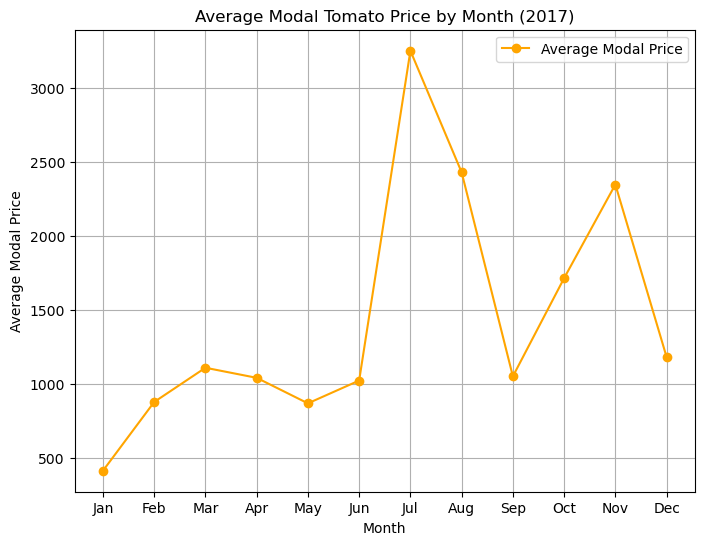

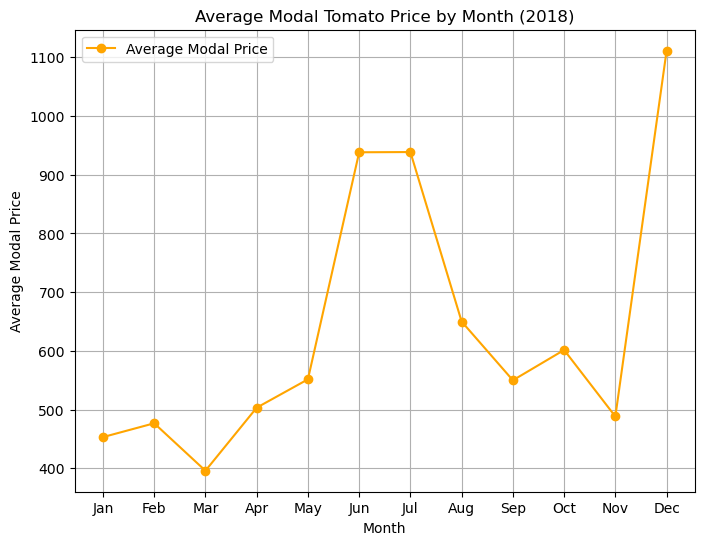

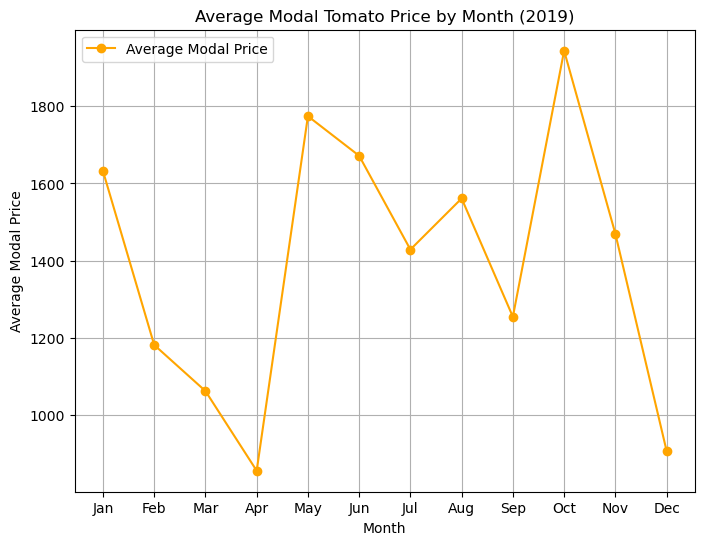

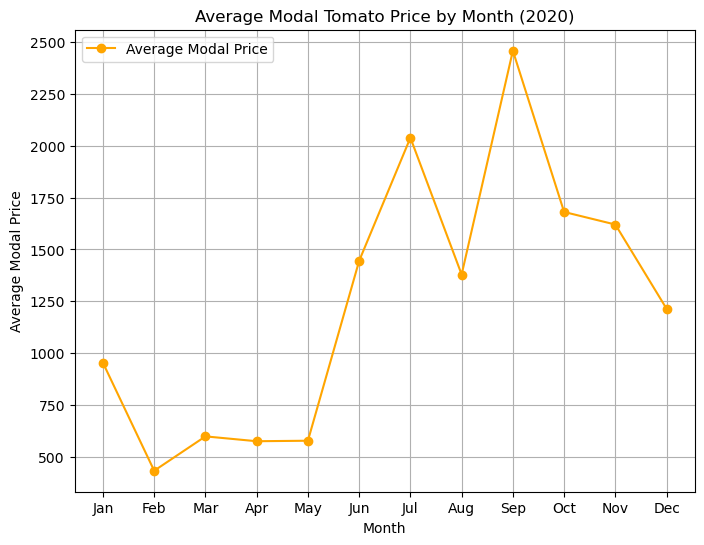

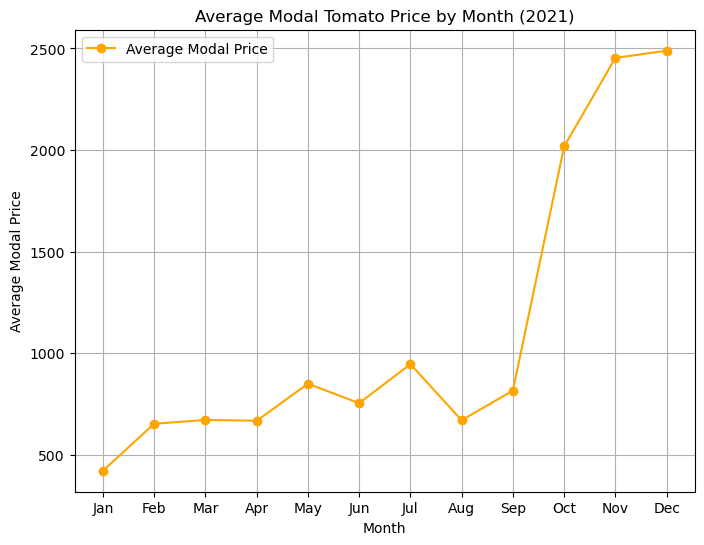

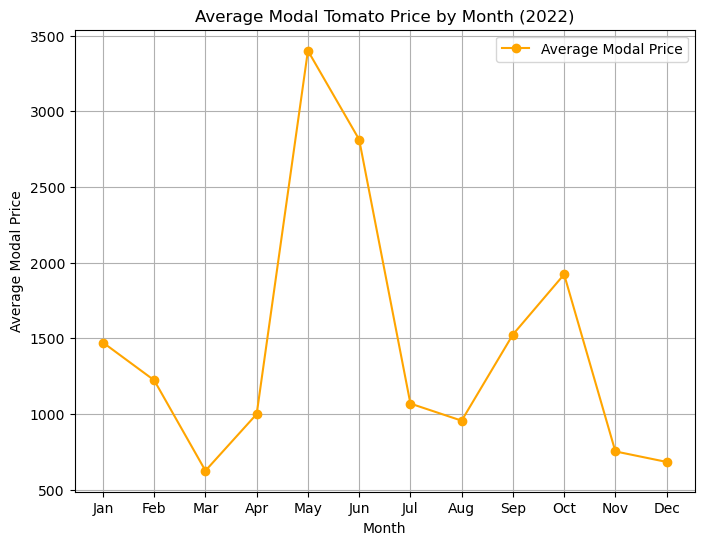

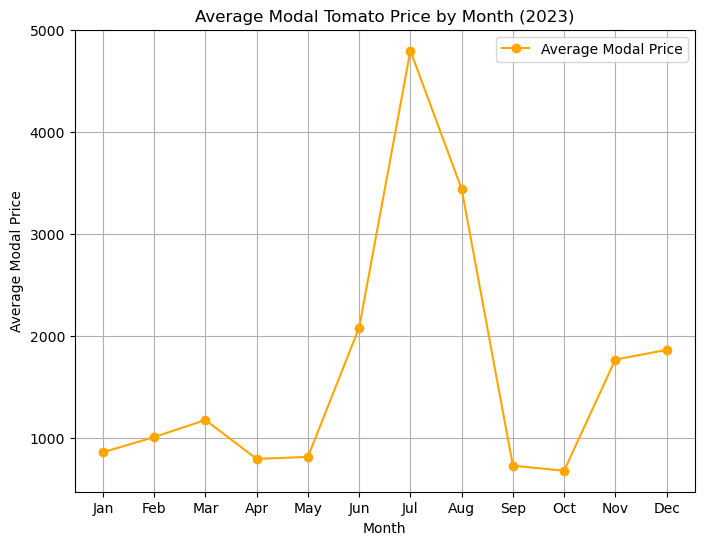

In [18]:
# Assuming df is your DataFrame containing the data

# Loop through the years from 2016 to 2023
for year in range(2016, 2024):
    # Filter data for the current year
    df_year = filter_data_by_year(df, year)
    
    # Visualize average price by month
    visualize_average_price_by_month(df_year, year)

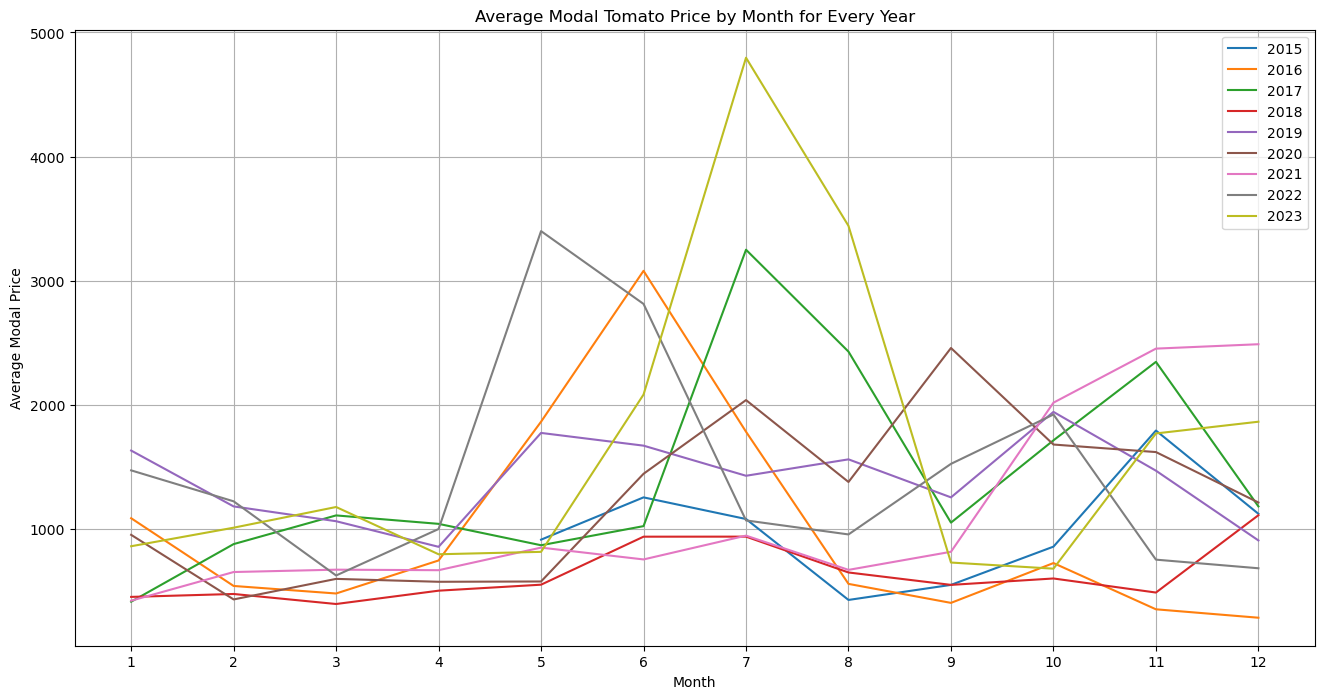

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

def visualize_monthly_prices_by_year(df):
    """
    Visualize the modal price of tomatoes for each month across multiple years in a single line chart.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
    """
    # Convert the 'index' column to datetime if it's not already
    df['index'] = pd.to_datetime(df['index'])
    
    # Extract year and month from the 'index' column
    df['Year'] = df['index'].dt.year
    df['Month'] = df['index'].dt.month
    
    # Group by year and month and calculate the mean modal price
    monthly_prices_by_year = df.groupby(['Year', 'Month'])['Modal_Price'].mean().unstack()
    
    # Plotting
    plt.figure(figsize=(16, 8))  # Increased figure size
    
    for year in monthly_prices_by_year.index:
        plt.plot(monthly_prices_by_year.columns, monthly_prices_by_year.loc[year], label=year)

    plt.xlabel('Month')
    plt.ylabel('Average Modal Price')
    plt.title('Average Modal Tomato Price by Month for Every Year')
    plt.xticks(range(1, 13))  # More ticks on the x-axis for better granularity
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize the modal price of tomatoes for each month across multiple years
visualize_monthly_prices_by_year(df)



In [20]:
import pandas as pd

# Assuming df is your DataFrame containing the data

def first_and_last_days_of_year(df):
    """
    Extract the data for the first and last days of each year.
    
    Parameters:
        df (DataFrame): The DataFrame containing the data.
    
    Returns:
        DataFrame: A DataFrame containing the data for the first and last days of each year.
    """
    # Convert the 'index' column to datetime if it's not already
    df['index'] = pd.to_datetime(df['index'])
    
    # Extract year from the 'index' column
    df['Year'] = df['index'].dt.year
    
    # Group by year and find the minimum and maximum dates for each year
    first_last_days = df.groupby('Year')['index'].agg(['min', 'max']).reset_index()
    
    # Sort the DataFrame by date
    first_last_days = first_last_days.sort_values(by='min')
    
    # Extract data for the first and last days of each year
    first_last_data = pd.concat([df[df['index'] == row['max']] for index, row in first_last_days.iterrows()], ignore_index=True)
    last_day_data = pd.concat([df[df['index'] == row['min']] for index, row in first_last_days.iterrows()], ignore_index=True)
    first_last_data = pd.concat([first_last_data, last_day_data], ignore_index=True)
    
    return first_last_data

# Get the data for the first and last days of each year
first_last_data = first_and_last_days_of_year(df)

# Display the extracted data
print("Data for the first and last days of each year:")
print(first_last_data)


Data for the first and last days of each year:
        index  Min_Price  Max_Price  Modal_Price  Day_of_Week  Month  \
0  2015-12-31       1000       3000         2000            3     12   
1  2016-12-31        100        500          300            5     12   
2  2017-12-31        300        900          600            6     12   
3  2018-12-31        600       2800         1700            0     12   
4  2019-12-31        500       1500         1000            1     12   
5  2020-12-31        500       1000          750            3     12   
6  2021-12-31        500       3000         1750            4     12   
7  2022-12-31        400       1000          700            5     12   
8  2023-12-31       1000       2500         1800            6     12   
9  2015-05-11        300       1800         1000            0      5   
10 2016-01-01       1700       3510         2500            4      1   
11 2017-01-01        200        600          400            6      1   
12 2018-01-01    

In [21]:
df.columns


Index(['index', 'Min_Price', 'Max_Price', 'Modal_Price', 'Day_of_Week',
       'Month', 'Is_Weekend', 'Year'],
      dtype='object')

In [22]:
df.head(10)

,index,Min_Price,Max_Price,Modal_Price,Day_of_Week,Month,Is_Weekend,Year
0,2015-05-11,300,1800,1000,0,5,0,2015
1,2015-05-12,200,1200,700,1,5,0,2015
2,2015-05-13,200,1200,700,2,5,0,2015
3,2015-05-14,200,1200,700,3,5,0,2015
4,2015-05-15,200,1200,700,4,5,0,2015
5,2015-05-16,200,1200,700,5,5,1,2015
6,2015-05-17,200,1200,700,6,5,1,2015
7,2015-05-18,250,1250,800,0,5,0,2015
8,2015-05-19,250,1250,800,1,5,0,2015
9,2015-05-20,500,2000,1000,2,5,0,2015


In [23]:
df.dtypes

index          datetime64[ns]
Min_Price               int64
Max_Price               int64
Modal_Price             int64
Day_of_Week             int32
Month                   int32
Is_Weekend              int32
Year                    int32
dtype: object

### Rainfall

In [24]:
import pandas as pd

# Load the Excel file into a DataFrame
file_path = r'C:\Users\Aaditya\OneDrive\Documents\tomato\rainfall_2015to2023.xlsx'
df_rainfall= pd.read_excel(file_path)


In [25]:
df_rainfall

,Year - Month,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2015 - 05,0,0,0,0,0,7.6,0,3.9,0.2,...,0,0,0,0,0,0,0,0.3,17.6,0
1,2015 - 06,8,0,0,0,13,7.4,11.1,2.6,1.1,...,56.3,26.3,59.7,35.8,9.9,2.1,0.6,0.1,1.6,NaN
2,2015 - 07,2.1,1.3,0,0.1,0,0.1,0.5,1.7,4.7,...,5.7,7.2,5.3,9,12.8,12.6,7.1,4.1,5.2,7.5
3,2015 - 08,14.8,3.5,3.6,3.2,3.8,9.6,14.7,8.4,2.6,...,2.1,4,4.2,0.8,7.4,7.9,4.5,2.3,1.8,1.8
4,2015 - 09,0.4,0.1,0.9,0,0,0,0,0,1.2,...,0.3,0,0,0,0,0,0,0,0.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023 - 08,15.3,9.8,10.6,12.4,8.2,8.7,6.6,3,4.2,...,0.1,0.1,1,5.3,11.4,0.2,2.8,4.9,1.3,0.5
68,2023 - 09,2.1,9.6,0.1,3.9,0.8,0,0.1,2.5,13.4,...,3,3.9,3.3,2.1,4.6,22.8,3.3,3.6,8.7,NaN
69,2023 - 10,14.9,10.3,0.1,0,3.6,0.1,0.1,0,0,...,0.2,0,0,0,0,0,0,0,0,1.5
70,2023 - 11,0,0,0,0,1.5,0.2,0,6.8,15.1,...,0,0,0,0.1,0,0,0.5,4,3.5,NaN


In [26]:
import pandas as pd

# Load the Excel file into a DataFrame
file_path = r'C:\Users\Aaditya\OneDrive\Documents\tomato\rainfall_2015to2023.xlsx'
df_rainfall = pd.read_excel(file_path)

# Melt the DataFrame to merge the day columns into a single column
df_rainfall_melted = pd.melt(df_rainfall, id_vars=['Year - Month'], var_name='Day', value_name='Value')

# Combine 'Year - Month' and 'Day' columns to create a new column 'Year-Month-Day'
df_rainfall_melted['Year-Month-Day'] = df_rainfall_melted['Year - Month'] + ' - ' + df_rainfall_melted['Day'].astype(str)  # Convert 'Day' to string

# Drop 'Year - Month' and 'Day' columns
df_transformed = df_rainfall_melted.drop(columns=['Year - Month', 'Day'])

# Rearrange the columns if necessary
# df_transformed = df_transformed[['Year-Month-Day', 'Value']]

# Save the transformed DataFrame to a new Excel file
df_transformed.to_excel('transformed_data.xlsx', index=False)


In [27]:
df_transformed

,Value,Year-Month-Day
0,0,2015 - 05 - 1
1,8,2015 - 06 - 1
2,2.1,2015 - 07 - 1
3,14.8,2015 - 08 - 1
4,0.4,2015 - 09 - 1
...,...,...
2227,0.5,2023 - 08 - 31
2228,NaN,2023 - 09 - 31
2229,1.5,2023 - 10 - 31
2230,NaN,2023 - 11 - 31


In [28]:
df

,index,Min_Price,Max_Price,Modal_Price,Day_of_Week,Month,Is_Weekend,Year
0,2015-05-11,300,1800,1000,0,5,0,2015
1,2015-05-12,200,1200,700,1,5,0,2015
2,2015-05-13,200,1200,700,2,5,0,2015
3,2015-05-14,200,1200,700,3,5,0,2015
4,2015-05-15,200,1200,700,4,5,0,2015
...,...,...,...,...,...,...,...,...
3152,2023-12-27,1000,3000,2000,2,12,0,2023
3153,2023-12-28,500,2700,1600,3,12,0,2023
3154,2023-12-29,1000,3600,2300,4,12,0,2023
3155,2023-12-30,1000,3600,2300,5,12,1,2023


In [29]:
df_transformed = df_transformed.set_index('Year-Month-Day')

In [30]:
df_transformed.index.name = 'index'

In [31]:
df_transformed

,Value
index,
2015 - 05 - 1,0
2015 - 06 - 1,8
2015 - 07 - 1,2.1
2015 - 08 - 1,14.8
2015 - 09 - 1,0.4
...,...
2023 - 08 - 31,0.5
2023 - 09 - 31,NaN
2023 - 10 - 31,1.5


In [32]:
df_transformed.index = df_transformed.index.str.replace(' ', '')

In [33]:
df_transformed

,Value
index,
2015-05-1,0
2015-06-1,8
2015-07-1,2.1
2015-08-1,14.8
2015-09-1,0.4
...,...
2023-08-31,0.5
2023-09-31,NaN
2023-10-31,1.5


In [34]:
df_transformed.columns

Index(['Value'], dtype='object')

In [35]:
df_transformed['index'] = df_transformed.index

In [36]:
df_transformed.columns


Index(['Value', 'index'], dtype='object')

In [37]:
import pandas as pd

# Assuming df_transformed is your DataFrame from the Excel file

# Inspect the 'index' column to identify any issues
print(df_transformed['index'])

# Fix or remove any problematic dates in the 'index' column

# Convert the 'index' column to datetime format
try:
    df_transformed['index'] = pd.to_datetime(df_transformed['index'])
except ValueError as e:
    print("Error:", e)

# Now the 'index' column is converted to datetime format
print(df_transformed['index'])


index
2015-05-1      2015-05-1
2015-06-1      2015-06-1
2015-07-1      2015-07-1
2015-08-1      2015-08-1
2015-09-1      2015-09-1
                 ...    
2023-08-31    2023-08-31
2023-09-31    2023-09-31
2023-10-31    2023-10-31
2023-11-31    2023-11-31
2023-12-31    2023-12-31
Name: index, Length: 2232, dtype: object
Error: day is out of range for month, at position 2161. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
index
2015-05-1      2015-05-1
2015-06-1      2015-06-1
2015-07-1      2015-07-1
2015-08-1      2015-08-1
2015-09-1      2015-09-1
                 ...    
2023-08-31    2023-08-31
2023-09-31    2023-09-31
2023-10-31    2023-10-31
2023-11-31    2023-11-31
2023-12-31    2023-12

In [38]:
import pandas as pd

# Assuming df_transformed is your DataFrame

# Convert the 'index_transformed' column to datetime format with errors='coerce'
df_transformed['index'] = pd.to_datetime(df_transformed['index'], errors='coerce')

# Remove rows with NaT values (invalid dates)
df_transformed = df_transformed.dropna(subset=['index'])

# Now the 'index_transformed' column is converted to datetime and rows with invalid dates are removed


In [39]:
import pandas as pd

# Assuming df and df_transformed are your DataFrames

# Change the name of the index column to 'date' in df
df = df.rename(columns={'index': 'date'})

# Change the name of the index column to 'date' in df_transformed
df_transformed = df_transformed.rename(columns={'index': 'date'})

# Display the updated column names
print("Updated column names in df:", df.columns)
print("Updated column names in df_transformed:", df_transformed.columns)

print("type df:", df.dtypes)
print("type df_transformed:", df_transformed.dtypes)

Updated column names in df: Index(['date', 'Min_Price', 'Max_Price', 'Modal_Price', 'Day_of_Week', 'Month',
       'Is_Weekend', 'Year'],
      dtype='object')
Updated column names in df_transformed: Index(['Value', 'date'], dtype='object')
type df: date           datetime64[ns]
Min_Price               int64
Max_Price               int64
Modal_Price             int64
Day_of_Week             int32
Month                   int32
Is_Weekend              int32
Year                    int32
dtype: object
type df_transformed: Value            object
date     datetime64[ns]
dtype: object


In [40]:
import pandas as pd

# Assuming df and df_transformed are your DataFrames

# Merge the DataFrames using a left join on the common column 'date'
merged_df = pd.merge(df, df_transformed, on='date', how='left')

# Display the merged DataFrame
print(merged_df)

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('merged_data.xlsx', index=False)



           date  Min_Price  Max_Price  Modal_Price  Day_of_Week  Month  \
0    2015-05-11        300       1800         1000            0      5   
1    2015-05-12        200       1200          700            1      5   
2    2015-05-13        200       1200          700            2      5   
3    2015-05-14        200       1200          700            3      5   
4    2015-05-15        200       1200          700            4      5   
...         ...        ...        ...          ...          ...    ...   
3152 2023-12-27       1000       3000         2000            2     12   
3153 2023-12-28        500       2700         1600            3     12   
3154 2023-12-29       1000       3600         2300            4     12   
3155 2023-12-30       1000       3600         2300            5     12   
3156 2023-12-31       1000       2500         1800            6     12   

      Is_Weekend  Year Value  
0              0  2015     0  
1              0  2015   2.5  
2              0  

In [41]:
merged_df.rename(columns={"Value":"rainfall"},inplace=True)


In [42]:
# Fill NaN values in the 'rainfall' column with 0
merged_df['rainfall'].fillna(0, inplace=True)

# Display the updated DataFrame
print(merged_df)
# Save the updated DataFrame to the same Excel file
merged_df.to_excel('merged_data.xlsx', index=False)


           date  Min_Price  Max_Price  Modal_Price  Day_of_Week  Month  \
0    2015-05-11        300       1800         1000            0      5   
1    2015-05-12        200       1200          700            1      5   
2    2015-05-13        200       1200          700            2      5   
3    2015-05-14        200       1200          700            3      5   
4    2015-05-15        200       1200          700            4      5   
...         ...        ...        ...          ...          ...    ...   
3152 2023-12-27       1000       3000         2000            2     12   
3153 2023-12-28        500       2700         1600            3     12   
3154 2023-12-29       1000       3600         2300            4     12   
3155 2023-12-30       1000       3600         2300            5     12   
3156 2023-12-31       1000       2500         1800            6     12   

      Is_Weekend  Year rainfall  
0              0  2015        0  
1              0  2015      2.5  
2        

In [43]:
# Replace '-' with NaN in the 'rainfall' column
merged_df['rainfall'].replace('-', np.nan, inplace=True)

# Convert the 'rainfall' column to numeric
merged_df['rainfall'] = pd.to_numeric(merged_df['rainfall'])

# Fill NaN values in the 'rainfall' column with 0
merged_df['rainfall'].fillna(0, inplace=True)

print(merged_df)
# Save the updated DataFrame to the same Excel file
merged_df.to_excel('merged_data.xlsx', index=False)

           date  Min_Price  Max_Price  Modal_Price  Day_of_Week  Month  \
0    2015-05-11        300       1800         1000            0      5   
1    2015-05-12        200       1200          700            1      5   
2    2015-05-13        200       1200          700            2      5   
3    2015-05-14        200       1200          700            3      5   
4    2015-05-15        200       1200          700            4      5   
...         ...        ...        ...          ...          ...    ...   
3152 2023-12-27       1000       3000         2000            2     12   
3153 2023-12-28        500       2700         1600            3     12   
3154 2023-12-29       1000       3600         2300            4     12   
3155 2023-12-30       1000       3600         2300            5     12   
3156 2023-12-31       1000       2500         1800            6     12   

      Is_Weekend  Year  rainfall  
0              0  2015       0.0  
1              0  2015       2.5  
2     

In [44]:
merged_df.columns

Index(['date', 'Min_Price', 'Max_Price', 'Modal_Price', 'Day_of_Week', 'Month',
       'Is_Weekend', 'Year', 'rainfall'],
      dtype='object')

In [45]:
merged_df.dtypes

date           datetime64[ns]
Min_Price               int64
Max_Price               int64
Modal_Price             int64
Day_of_Week             int32
Month                   int32
Is_Weekend              int32
Year                    int32
rainfall              float64
dtype: object

In [46]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame containing the data

# # Pivot the data to have 'Month' as rows, 'Year' as columns, and 'Modal_Price' as values
# pivot_df = df.pivot_table(index='Month', columns='Year', values='Modal_Price', aggfunc='mean')

# # Create a heatmap with rainfall as the y-axis, months as the x-axis, and modal price as the color
# plt.figure(figsize=(12, 8))
# sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
# plt.title('Modal Price with Respect to Rainfall for Each Year and Month')
# plt.xlabel('Year')
# plt.ylabel('Month')
# plt.show()


In [47]:
# import matplotlib.pyplot as plt

# # Get unique years in the DataFrame
# years = merged_df['Year'].unique()

# # Create subplots for each year
# fig, axs = plt.subplots(len(years), 1, figsize=(12, 6*len(years)), sharex=True)

# # Iterate over each year
# for i, year in enumerate(years):
#     # Filter data for the current year
#     df_year = merged_df[merged_df['Year'] == year]
    
#     # Group by month and calculate the mean modal price and rainfall
#     mean_modal_rainfall = df_year.groupby('Month')[['Modal_Price', 'rainfall']].mean()
    
#     # Plot modal price against rainfall for each month
#     axs[i].plot(mean_modal_rainfall['rainfall'], mean_modal_rainfall['Modal_Price'], marker='o', linestyle='-', color='blue')
#     axs[i].set_title(f'Modal Price vs. Rainfall for Year {year}')
#     axs[i].set_xlabel('Rainfall')
#     axs[i].set_ylabel('Modal Price')
#     axs[i].grid(True)

# # Add x-axis label to the last subplot
# plt.xlabel('Rainfall')

# # Adjust layout
# plt.tight_layout()

# # Show the plot
# plt.show()


In [48]:
# import matplotlib.pyplot as plt

# # Group the data by year and month
# grouped_data = merged_df.groupby(['Year', 'Month'])

# # Iterate over each group (year-month) and create scatter plots
# for (year, month), group_data in grouped_data:
#     # Create a scatter plot for the current month
#     plt.figure(figsize=(20,10))
#     plt.scatter(group_data['rainfall'], group_data['Modal_Price'], alpha=0.5)
#     plt.title(f'Modal Price vs Rainfall - {year}-{month}')
#     plt.xlabel('Rainfall')
#     plt.ylabel('Modal Price')
#     plt.grid(True)
    
#     # Annotate each point with its corresponding date
#     for index, row in group_data.iterrows():
#         plt.annotate(f"{row['date'].day}", (row['rainfall'], row['Modal_Price']), textcoords="offset points", xytext=(0,10), ha='center')
    
#     plt.show()


In [49]:
merged_df.columns

Index(['date', 'Min_Price', 'Max_Price', 'Modal_Price', 'Day_of_Week', 'Month',
       'Is_Weekend', 'Year', 'rainfall'],
      dtype='object')

In [50]:
import pandas as pd

# Assuming merged_df is your DataFrame containing the data
# Sort the DataFrame by the 'date' column
merged_df.sort_values(by='date', inplace=True)

# Create new columns for past 7 days' data
for i in range(1, 8):
    merged_df[f'Past_Modal_Price_{i}'] = merged_df['Modal_Price'].shift(i)
    merged_df[f'Past_Day_of_Week_{i}'] = merged_df['Day_of_Week'].shift(i)
    merged_df[f'Past_Month_{i}'] = merged_df['Month'].shift(i)
    merged_df[f'Past_Year_{i}'] = merged_df['Year'].shift(i)
    merged_df[f'Past_Rainfall_{i}'] = merged_df['rainfall'].shift(i)

# Create new columns for today's data
merged_df['Today_Day_of_Week'] = merged_df['Day_of_Week']
merged_df['Today_Month'] = merged_df['Month']
merged_df['Today_Year'] = merged_df['Year']
merged_df['Today_Rainfall'] = merged_df['rainfall']

# Drop rows with NaN values resulting from shifting
merged_df.dropna(inplace=True)

# Split the data into input features (X) and target variable (y)
X = merged_df.drop(columns=['date', 'Modal_Price','Min_Price','Max_Price'])
y = merged_df['Modal_Price']

# Optionally, you can further preprocess the data, such as scaling the features or encoding categorical variables


In [51]:
X

,Day_of_Week,Month,Is_Weekend,Year,rainfall,Past_Modal_Price_1,Past_Day_of_Week_1,Past_Month_1,Past_Year_1,Past_Rainfall_1,...,Past_Rainfall_6,Past_Modal_Price_7,Past_Day_of_Week_7,Past_Month_7,Past_Year_7,Past_Rainfall_7,Today_Day_of_Week,Today_Month,Today_Year,Today_Rainfall
7,0,5,0,2015,4.4,700.0,6.0,5.0,2015.0,0.0,...,2.5,1000.0,0.0,5.0,2015.0,0.0,0,5,2015,4.4
8,1,5,0,2015,0.0,800.0,0.0,5.0,2015.0,4.4,...,4.0,700.0,1.0,5.0,2015.0,2.5,1,5,2015,0.0
9,2,5,0,2015,0.0,800.0,1.0,5.0,2015.0,0.0,...,0.7,700.0,2.0,5.0,2015.0,4.0,2,5,2015,0.0
10,3,5,0,2015,0.0,1000.0,2.0,5.0,2015.0,0.0,...,0.0,700.0,3.0,5.0,2015.0,0.7,3,5,2015,0.0
11,4,5,0,2015,0.0,1200.0,3.0,5.0,2015.0,0.0,...,0.1,700.0,4.0,5.0,2015.0,0.0,4,5,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,2,12,0,2023,0.0,2000.0,1.0,12.0,2023.0,0.0,...,0.0,1800.0,2.0,12.0,2023.0,0.0,2,12,2023,0.0
3153,3,12,0,2023,0.0,2000.0,2.0,12.0,2023.0,0.0,...,0.0,1500.0,3.0,12.0,2023.0,0.0,3,12,2023,0.0
3154,4,12,0,2023,0.0,1600.0,3.0,12.0,2023.0,0.0,...,0.0,1800.0,4.0,12.0,2023.0,0.0,4,12,2023,0.0
3155,5,12,1,2023,0.0,2300.0,4.0,12.0,2023.0,0.0,...,0.0,1800.0,5.0,12.0,2023.0,0.0,5,12,2023,0.0


In [52]:
y

7        800
8        800
9       1000
10      1200
11      1200
        ... 
3152    2000
3153    1600
3154    2300
3155    2300
3156    1800
Name: Modal_Price, Length: 3150, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the input features
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the standardized input features


In [54]:
X_scaled

array([[-1.5       , -0.49240459, -0.63245553, ..., -0.49240459,
        -1.67205926,  0.02147274],
       [-1.        , -0.49240459, -0.63245553, ..., -0.49240459,
        -1.67205926, -0.36822496],
       [-0.5       , -0.49240459, -0.63245553, ..., -0.49240459,
        -1.67205926, -0.36822496],
       ...,
       [ 0.5       ,  1.5534822 , -0.63245553, ...,  1.5534822 ,
         1.53316616, -0.36822496],
       [ 1.        ,  1.5534822 ,  1.58113883, ...,  1.5534822 ,
         1.53316616, -0.36822496],
       [ 1.5       ,  1.5534822 ,  1.58113883, ...,  1.5534822 ,
         1.53316616, -0.36822496]])

In [55]:

merged_df.shape

(3150, 48)

In [56]:
X_scaled.shape

(3150, 44)

In [57]:
y.shape

(3150,)

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load your preprocessed data
# Assuming X_scaled and y are your input features and target variable, respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape input features for LSTM (assuming you want a 3D input shape)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the model architecture
model = Sequential([
    LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", test_loss)


Epoch 1/50
71/71 [==============================] - 6s 20ms/step - loss: 2285099.5000 - val_loss: 2568209.5000
Epoch 2/50
71/71 [==============================] - 0s 4ms/step - loss: 2222708.5000 - val_loss: 2451763.7500
Epoch 3/50
71/71 [==============================] - 0s 4ms/step - loss: 2078256.1250 - val_loss: 2278259.7500
Epoch 4/50
71/71 [==============================] - 0s 4ms/step - loss: 1904712.7500 - val_loss: 2098327.5000
Epoch 5/50
71/71 [==============================] - 0s 4ms/step - loss: 1729583.5000 - val_loss: 1914690.2500
Epoch 6/50
71/71 [==============================] - 0s 4ms/step - loss: 1555426.8750 - val_loss: 1736195.6250
Epoch 7/50
71/71 [==============================] - 0s 5ms/step - loss: 1388795.5000 - val_loss: 1567603.8750
Epoch 8/50
71/71 [==============================] - 0s 4ms/step - loss: 1239409.1250 - val_loss: 1418212.8750
Epoch 9/50
71/71 [==============================] - 0s 4ms/step - loss: 1107403.3750 - val_loss: 1293373.0000
Epoch 10/

In [62]:
merged_df_norainfall = merged_df.copy()


In [66]:
import pandas as pd

# Assuming merged_df_norainfall is your DataFrame containing the data
# Sort the DataFrame by the 'date' column
merged_df_norainfall.sort_values(by='date', inplace=True)

# Create new columns for past 7 days' data
for i in range(1, 8):
    merged_df_norainfall[f'Past_Modal_Price_{i}'] = merged_df_norainfall['Modal_Price'].shift(i)
    merged_df_norainfall[f'Past_Day_of_Week_{i}'] = merged_df_norainfall['Day_of_Week'].shift(i)
    merged_df_norainfall[f'Past_Month_{i}'] = merged_df_norainfall['Month'].shift(i)
    merged_df_norainfall[f'Past_Year_{i}'] = merged_df_norainfall['Year'].shift(i)

# Create new columns for today's data
merged_df_norainfall['Today_Day_of_Week'] = merged_df_norainfall['Day_of_Week']
merged_df_norainfall['Today_Month'] = merged_df_norainfall['Month']
merged_df_norainfall['Today_Year'] = merged_df_norainfall['Year']

# Drop rows with NaN values resulting from shifting
merged_df_norainfall.dropna(inplace=True)

# Split the data into input features (X) and target variable (y)
X_norainfall = merged_df_norainfall.drop(columns=['date', 'Modal_Price','Min_Price','Max_Price','rainfall'])
y_norainfall = merged_df_norainfall['Modal_Price']

# Optionally, you can further preprocess the data, such as scaling the features or encoding categorical variables

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_norainfall = StandardScaler()

# Fit the scaler on the input features
X_scaled_norainfall = scaler_norainfall.fit_transform(X_norainfall)

# Now X_scaled_norainfall contains the standardized input features

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load your preprocessed data
# Assuming X_scaled_norainfall and y_norainfall are your input features and target variable, respectively

# Split the data into training and testing sets
X_train_norainfall, X_test_norainfall, y_train_norainfall, y_test_norainfall = train_test_split(X_scaled_norainfall, y_norainfall, test_size=0.2, random_state=42)

# Reshape input features for LSTM (assuming you want a 3D input shape)
X_train_reshaped_norainfall = X_train_norainfall.reshape((X_train_norainfall.shape[0], 1, X_train_norainfall.shape[1]))
X_test_reshaped_norainfall = X_test_norainfall.reshape((X_test_norainfall.shape[0], 1, X_test_norainfall.shape[1]))

# Define the model architecture
model_norainfall = Sequential([
    LSTM(units=64, input_shape=(X_train_reshaped_norainfall.shape[1], X_train_reshaped_norainfall.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(units=64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
optimizer_norainfall = Adam(learning_rate=0.001)
model_norainfall.compile(optimizer=optimizer_norainfall, loss='mean_squared_error')

# Train the model
history_norainfall = model_norainfall.fit(X_train_reshaped_norainfall, y_train_norainfall, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test set
test_loss_norainfall = model_norainfall.evaluate(X_test_reshaped_norainfall, y_test_norainfall)
print("Test Loss:", test_loss_norainfall)


Epoch 1/50
70/70 [==============================] - 6s 19ms/step - loss: 2363820.2500 - val_loss: 2098645.7500
Epoch 2/50
70/70 [==============================] - 0s 5ms/step - loss: 2294076.2500 - val_loss: 1998559.0000
Epoch 3/50
70/70 [==============================] - 0s 4ms/step - loss: 2170038.5000 - val_loss: 1868363.1250
Epoch 4/50
70/70 [==============================] - 0s 4ms/step - loss: 2020817.0000 - val_loss: 1722185.5000
Epoch 5/50
70/70 [==============================] - 0s 5ms/step - loss: 1860590.0000 - val_loss: 1566962.6250
Epoch 6/50
70/70 [==============================] - 1s 9ms/step - loss: 1691387.8750 - val_loss: 1407099.6250
Epoch 7/50
70/70 [==============================] - 0s 5ms/step - loss: 1518531.1250 - val_loss: 1254463.1250
Epoch 8/50
70/70 [==============================] - 0s 5ms/step - loss: 1360363.3750 - val_loss: 1114772.0000
Epoch 9/50
70/70 [==============================] - 0s 4ms/step - loss: 1218090.3750 - val_loss: 995214.0625
Epoch 10/5